In [1]:
from src import esma

In [2]:
#Step 1 - Initialize model
model = esma.project(project_id="C_Projection") #Initialize model
model.outdir('./outdir')
model.set_cores(64) #Define number of processing cores
model.get_structure(format="poscar",path="./Structures/C.poscar")
model.set_pseudo(path="./Pseudopotentials/PBE/PAW")
model.ecutwfc(120) #Wavefunction cut-off
model.ecutrho(500)
model.k_points(8) #k mesh 
model.degauss(0.03) #degauss value
model.conv_thr("1e-8") #electron convergence threshold
model.smearing('gaussian') #Marzari-Vanderbilt smearing

In [3]:
model.debug(True)

In [4]:
#Step 2 - Crystal optimization
model.optimize('vc-relax')

Starting vc-relax iteration 1 
vc-relax is converged after 1 steps


In [5]:
#Step 3 - Atomic optimization
model.make_layer(layer_type='mono') #mono layer 
model.k_points([8,8,1])
model.optimize('relax')

Starting relax iteration 1 
relax is converged after 1 steps


In [6]:
#Step 4 - Scf calculation
# model.nbnd(10)
model.nbnd(12)
model.calculate('scf')

In [7]:
#Step 5 - Bands calculation
label = ['GAMMA','M','K','GAMMA'] #choose corners
points = [[0,0,0],[0.5,0,0],[0.33333,0.33333,0],[0,0,0]]
model.band_points(label=label,points=points,number=40) #define path
model.calculate('bands')

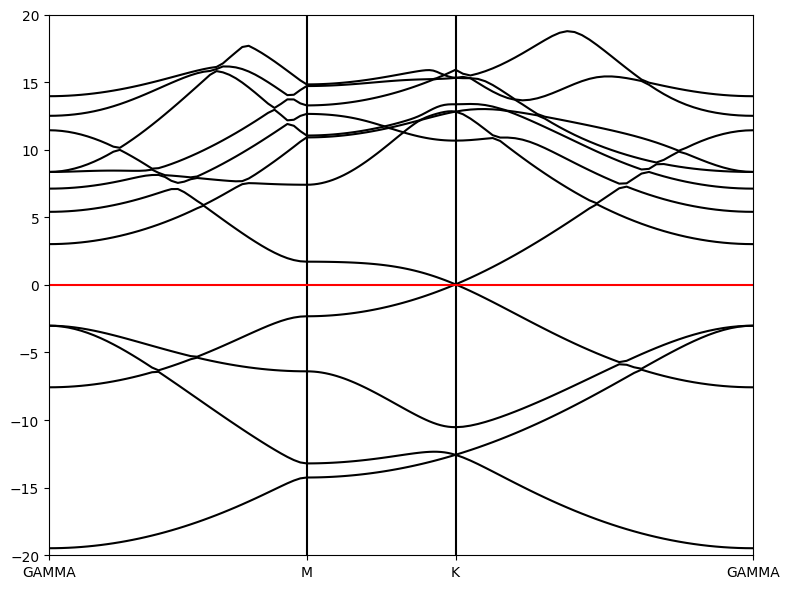

In [8]:
#Step 6 - Plotting
model.plot('electron',ylim=[-20,20],save=True) #plot electron bands

In [21]:
model.debug(False)

In [22]:
# #Calculate PDOS
# afm.debug=False
model.kdos(deltaE=0.005,ngauss=0,Emin=-15,Emax=15)
model.calculate('kdos')

kdos for results is started
kdos for results is finished


Projects/C_Projection/results/dos.k.pdos_atm#*(C)_wfc#*(p)
['Projects/C_Projection/results/dos.k.pdos_atm#1(C)_wfc#2(p)', 'Projects/C_Projection/results/dos.k.pdos_atm#2(C)_wfc#2(p)']


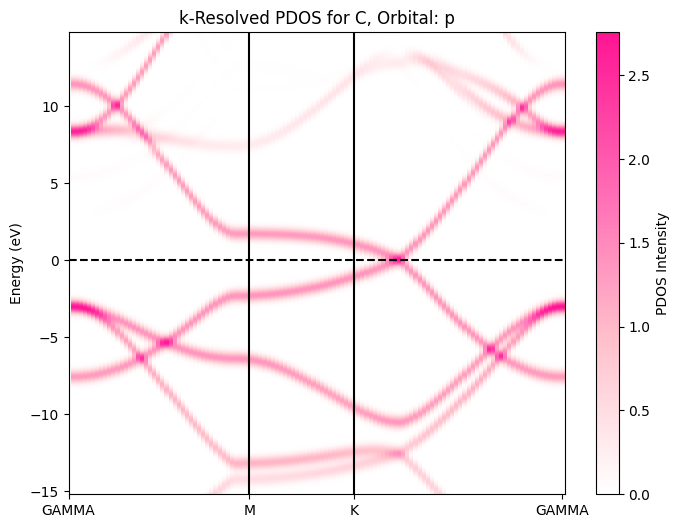

In [25]:
model.plot('kdos',atom='C',orbital='p')